In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

formandos_terminados = pd.read_excel("Ficheiros2022/Formandos_Terminados2018.xlsx")
formandos_terminados.head()


,UTE_ID,CodCEFP,CodMedidaOrcam,Descritivo CodMedidaOrcam,Sexo,DataNascimento,IdadeEmAnos,Categoria,CodHabilitacao,Habilitacao,...,Mes9_Tipo,Mes10,Mes10_Remuneracao,Mes10_Tipo,Mes11,Mes11_Remuneracao,Mes11_Tipo,Mes12,Mes12_Remuneracao,Mes12_Tipo
0,107,202,D112218,Formação Modular,F,1971-08-25,47,2,06,6 Anos,...,TCO,1,658.0,TCO,1,658.0,TCO,1,658.0,TCO
1,112,310,D112225,Vida Ativa- Emprego Qualificado - Gestão Direta,M,1956-07-15,62,2,06,6 Anos,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,186,401,D112225,Vida Ativa- Emprego Qualificado - Gestão Direta,F,1966-04-28,52,2,12,12 Anos,...,TI,1,418.0,TI,1,418.0,TI,1,418.0,TI
3,276,404,D113202,Cursos de Educação e Formação para Adultos,F,1976-10-10,42,2,12,12 Anos,...,TCO,1,600.0,TCO,0,NaN,NaN,0,NaN,NaN
4,286,314,D112218,Formação Modular,F,1969-04-10,49,3,09,9 Anos,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


# 1. Análise dos Dados


# 2. Pré-processamento dos Dados

In [4]:
df = pd.DataFrame(formandos_terminados)
df = df.iloc[:,[0,4,6,7,8,14,19,21,22,24,25,27,30,33,36,39,42,45,48,51,54,57,60]]

Categorizar Códigos de Habilitação de licenciados, bacharelatos, mestres e sem habilitação

In [5]:
df.loc[df['CodHabilitacao'] == 'SL', 'CodHabilitacao'] = '-2'
df.loc[df['CodHabilitacao'] == 'BM', 'CodHabilitacao'] = '20'
df.loc[df['CodHabilitacao'] == 'LC', 'CodHabilitacao'] = '30'
df.loc[df['CodHabilitacao'] == 'MT', 'CodHabilitacao'] = '40'

Mudar tipo de dados do Código de habilitação para inteiro

In [6]:
df['CodHabilitacao'] = df['CodHabilitacao'].str.lstrip('0')
df['CodHabilitacao'] = pd.to_numeric(df['CodHabilitacao'], errors='coerce')
# Preencher NaNs com um valor padrão, como -1
df['CodHabilitacao'] = df['CodHabilitacao'].fillna(-1).astype(int)
df.dropna(inplace=True)

In [7]:
df

,UTE_ID,Sexo,IdadeEmAnos,Categoria,CodHabilitacao,CodDeficiencia,CodMotivoSaida,HorasForm,AreaFormacao,NivelFormacaoAccao,...,Mes3,Mes4,Mes5,Mes6,Mes7,Mes8,Mes9,Mes10,Mes11,Mes12
0,107,F,47,2,6,0,91,25.0,341,2,...,1,1,1,1,1,1,1,1,1,1
1,112,M,62,2,6,0,91,150.0,522,2,...,0,0,0,0,0,0,0,0,0,0
2,186,F,52,2,12,0,91,100.0,344,4,...,1,1,1,1,1,1,1,1,1,1
3,276,F,42,2,12,0,92,507.0,345,4,...,1,1,1,1,1,1,1,1,0,0
4,286,F,49,3,9,0,91,41.0,346,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101275,6820294,F,50,3,9,0,91,25.0,761,2,...,1,1,1,1,1,1,0,0,0,0
101276,6821891,F,58,3,9,0,91,50.0,346,2,...,0,0,0,0,0,0,0,0,0,0
101277,6822293,M,23,3,12,0,93,21.0,225,4,...,0,0,0,0,0,0,0,0,0,0
101278,6822296,F,51,3,12,0,91,21.0,225,4,...,0,0,0,0,0,0,0,0,0,0


Categorizar Nivel de Formação Acção

In [8]:
df.loc[df['NivelFormacaoAccao'] == 'L', 'NivelFormacaoAccao'] = '-1'
df.loc[df['NivelFormacaoAccao'] == 'T', 'NivelFormacaoAccao'] = '-2'
df.NivelFormacaoAccao = df.NivelFormacaoAccao.astype(int)

Categorizar coluna 'Sexo'

In [9]:
df.Sexo = df.Sexo.astype('category')
df.dtypes

UTE_ID                     int64
Sexo                    category
IdadeEmAnos                int64
Categoria                  int64
CodHabilitacao             int32
CodDeficiencia             int64
CodMotivoSaida             int64
HorasForm                float64
AreaFormacao               int64
NivelFormacaoAccao         int32
CodSaidaProfissional      object
Mes1                       int64
Mes2                       int64
Mes3                       int64
Mes4                       int64
Mes5                       int64
Mes6                       int64
Mes7                       int64
Mes8                       int64
Mes9                       int64
Mes10                      int64
Mes11                      int64
Mes12                      int64
dtype: object

Factorização das colunas passadas como categoria - Sexo [F,M] --> [0,1]

In [10]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [11]:
df

,UTE_ID,Sexo,IdadeEmAnos,Categoria,CodHabilitacao,CodDeficiencia,CodMotivoSaida,HorasForm,AreaFormacao,NivelFormacaoAccao,...,Mes3,Mes4,Mes5,Mes6,Mes7,Mes8,Mes9,Mes10,Mes11,Mes12
0,107,0,47,2,6,0,91,25.0,341,2,...,1,1,1,1,1,1,1,1,1,1
1,112,1,62,2,6,0,91,150.0,522,2,...,0,0,0,0,0,0,0,0,0,0
2,186,0,52,2,12,0,91,100.0,344,4,...,1,1,1,1,1,1,1,1,1,1
3,276,0,42,2,12,0,92,507.0,345,4,...,1,1,1,1,1,1,1,1,0,0
4,286,0,49,3,9,0,91,41.0,346,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101275,6820294,0,50,3,9,0,91,25.0,761,2,...,1,1,1,1,1,1,0,0,0,0
101276,6821891,0,58,3,9,0,91,50.0,346,2,...,0,0,0,0,0,0,0,0,0,0
101277,6822293,1,23,3,12,0,93,21.0,225,4,...,0,0,0,0,0,0,0,0,0,0
101278,6822296,0,51,3,12,0,91,21.0,225,4,...,0,0,0,0,0,0,0,0,0,0


## Criar Variável alvo EficienciaFormacao

In [12]:
meses = df.iloc[:, -12:]
eficienciaFormacao = meses.sum(axis=1)
df = df.iloc[:,:-12]
df['EficienciaFormacao'] = eficienciaFormacao

In [13]:
df

,UTE_ID,Sexo,IdadeEmAnos,Categoria,CodHabilitacao,CodDeficiencia,CodMotivoSaida,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,EficienciaFormacao
0,107,0,47,2,6,0,91,25.0,341,2,34120,12
1,112,1,62,2,6,0,91,150.0,522,2,5221,0
2,186,0,52,2,12,0,91,100.0,344,4,3441,12
3,276,0,42,2,12,0,92,507.0,345,4,3451,10
4,286,0,49,3,9,0,91,41.0,346,2,3461,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101275,6820294,0,50,3,9,0,91,25.0,761,2,7615,8
101276,6821891,0,58,3,9,0,91,50.0,346,2,3461,0
101277,6822293,1,23,3,12,0,93,21.0,225,4,2251,0
101278,6822296,0,51,3,12,0,91,21.0,225,4,2251,0


In [14]:
import re
df.CodSaidaProfissional = df.CodSaidaProfissional.apply(lambda x: re.sub('\D','',str(x))).astype(int)

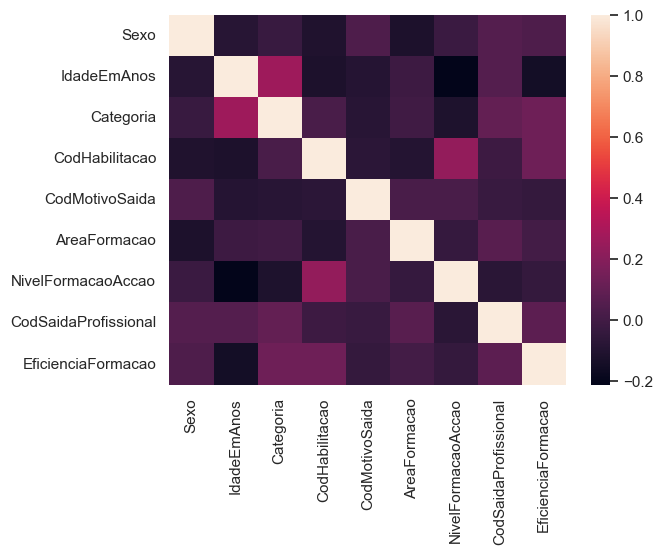

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
dummies = df.iloc[:,[1,2,3,4,6,8,9,10,11]]
sns.heatmap(dummies.corr(),
            xticklabels=dummies.columns,
            yticklabels=dummies.columns)
plt.show()

### Correlações:
-   Idade e Categoria
-   NivelFormacaoAccao e CodHabilitacao
-   Categoria e CodSaidaProfissional
-   EficienciaFormacao e Categoria
-   EficienciaFormacao e CodigoHabilitacao
-   EficienciaFormacao e Sexo

In [16]:
idade_categoria = df.iloc[:,[2, 3]].values
nfa_ch = df.iloc[:,[9, 4]].values
categoria_csp = df.iloc[:,[3,10]].values
ef_categoria = df.iloc[:,[11,3]].values
ef_ch = df.iloc[:,[11,4]].values
ef_sexo = df.iloc[:,[11,1]].values

### Clustering
K-Means

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(df)

In [18]:
kmeans.labels_

array([3, 3, 3, ..., 4, 4, 4])

In [19]:
kmeans.cluster_centers_

array([[4.61355666e+06, 3.97554236e-01, 3.74356517e+01, 2.06549474e+00,
        1.21080016e+01, 1.29390323e+00, 9.14324181e+01, 2.05711800e+02,
        5.65967076e+02, 2.89676054e+00, 1.34128680e+04, 4.94485273e+00],
       [2.07860467e+06, 2.93998356e-01, 4.59775829e+01, 2.09038093e+00,
        1.09735818e+01, 1.58048780e+00, 9.13987942e+01, 1.67036119e+02,
        5.63345793e+02, 2.84680734e+00, 1.36060356e+04, 4.66631954e+00],
       [3.35589605e+06, 3.57298619e-01, 4.08149078e+01, 2.13004692e+00,
        1.20683275e+01, 1.36661600e+00, 9.14114188e+01, 1.96618384e+02,
        5.64429591e+02, 2.88343356e+00, 1.34273999e+04, 4.81695632e+00],
       [8.53050704e+05, 2.80394370e-01, 4.79041991e+01, 2.12882342e+00,
        1.08332838e+01, 1.52236147e+00, 9.13468551e+01, 2.03384451e+02,
        5.78465285e+02, 2.87580923e+00, 1.31219148e+04, 3.95973154e+00],
       [6.36321339e+06, 4.79881713e-01, 3.30315852e+01, 1.98455343e+00,
        1.16425897e+01, 7.24415642e-01, 9.14147922e+01, 2.41

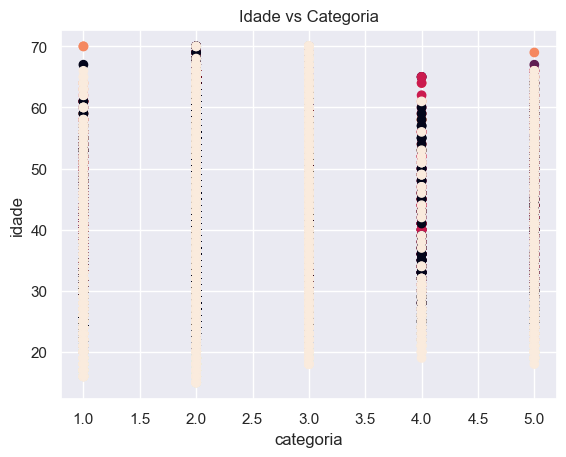

In [20]:
plt.scatter(idade_categoria[:,1], idade_categoria[:,0], c=kmeans.labels_)
plt.xlabel("categoria")
plt.ylabel("idade")
plt.title("Idade vs Categoria")
plt.show()

1- DESEMPREGADO 1ºEMPREGO
2- DESEMPREGADO NOVO EMPREGO
3- EMPREGADO
4- TEMPO PARCIAL
5- OCUPADO

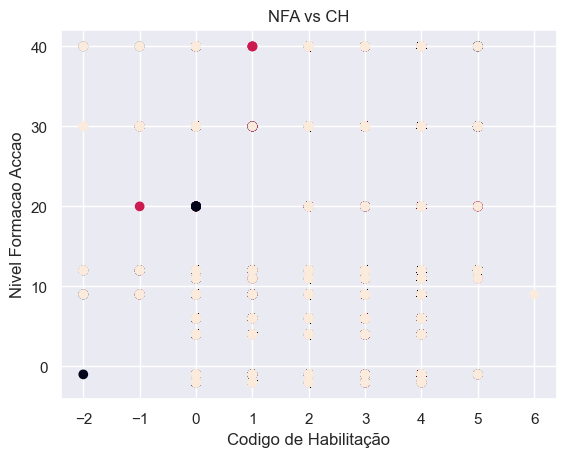

In [21]:
plt.scatter(nfa_ch[:,0], nfa_ch[:,1], c=kmeans.labels_)
plt.ylabel("Nivel Formacao Accao")
plt.xlabel("Codigo de Habilitação")
plt.title("NFA vs CH")
plt.show()

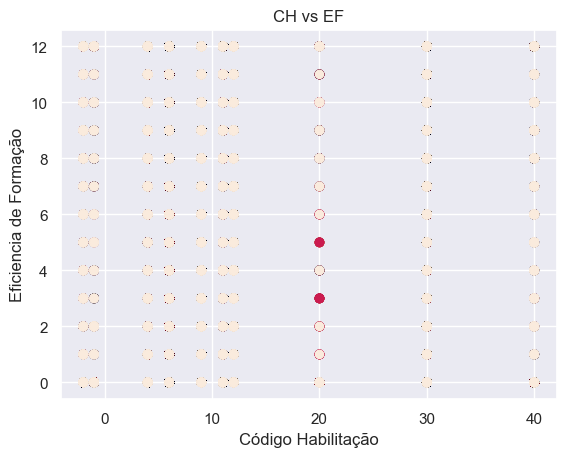

In [22]:
plt.scatter(ef_ch[:,1], ef_ch[:,0], c=kmeans.labels_)
plt.xlabel("Código Habilitação")
plt.ylabel("Eficiencia de Formação")
plt.title("CH vs EF")
plt.show()

# 3. Divisão dos dados em Teste e Treino

In [27]:
from sklearn.model_selection import train_test_split

# Supondo que você tenha um DataFrame chamado 'df' com suas variáveis descritivas e a variável alvo 'Eficiência de Formação'

# Separar os dados em variáveis descritivas (X) e variável alvo (y)
X = dummies.drop('EficienciaFormacao', axis=1)  # Variáveis descritivas
y = dummies['EficienciaFormacao']  # Variável alvo

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Treinar o modelo

Regressão Logística

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0, max_iter=5000)
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
print(scores)

KeyboardInterrupt: 

Gaussiana

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
scores = cross_val_score(gnb_clf, X_train, y_train, cv=5)
print(scores)

# 5. Avaliação do Modelo

In [26]:
from sklearn.metrics import classification_report

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(classification_report(y_test, y_pred ))

KeyboardInterrupt: 

# 6. Ajuste do Modelo